# Assignment 6

### <span style="color:chocolate"> Submission requirements </span>

Your work will not be graded if your notebook doesn't include output. In other words, <span style="color:red"> make sure to rerun your notebook before submitting to Gradescope </span> (Note: if you are using Google Colab: go to Edit > Notebook Settings  and uncheck Omit code cell output when saving this notebook, otherwise the output is not printed).

Additional points may be deducted if these requirements are not met:
    
* Comment your code;
* Each graph should have a title, labels for each axis, and (if needed) a legend. Each graph should be understandable on its own;
* Try and minimize the use of the global namespace (meaning, keep things inside functions).

``Objectives``

* This assignment connects all the pieces involved in training feed-forward fully connected neural networks (FFNN); 

* You will run a full set of experiments to explore different hyperparameters and hidden layer sizes for two datasets, and then document your findings.

``Data``
* Digits MNIST
* Fashion MNIST

### Import libraries

---
### Step 1: Data ingestion

In [2]:
# Load the Fashion MNIST dataset.
(X_train_fashion, Y_train_fashion), (X_test_fashion, Y_test_fashion) = fashion_mnist.load_data()

# Load the Digits MNIST dataset.
(X_train_digits, Y_train_digits), (X_test_digits, Y_test_digits) = mnist.load_data()

---
### Step 2: Data preprocessing

``Fashion MNIST``

In [3]:
# Normalize
X_train_fashion = X_train_fashion / 255.
X_test_fashion = X_test_fashion / 255.

# Flatten Y_train and Y_test, so they become vectors of label values.
Y_train_fashion = Y_train_fashion.flatten()
Y_test_fashion = Y_test_fashion.flatten()

label_names = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
               'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

# Apply random shufflying to training examples.
np.random.seed(0)
indices = np.arange(X_train_fashion.shape[0])
shuffled_indices = np.random.permutation(indices)
X_train_fashion = X_train_fashion[shuffled_indices]
Y_train_fashion = Y_train_fashion[shuffled_indices]

``Digits MNIST``

In [4]:
# Normalize
X_train_digits = X_train_digits / 255.
X_test_digits = X_test_digits / 255.

# Flatten Y_train and Y_test, so they become vectors of label values.
Y_train_digits = Y_train_digits.flatten()
Y_test_digits = Y_test_digits.flatten()

# Apply random shufflying to training examples.
np.random.seed(0)
indices = np.arange(X_train_digits.shape[0])
shuffled_indices = np.random.permutation(indices)
X_train_digits = X_train_digits[shuffled_indices]
Y_train_digits = Y_train_digits[shuffled_indices]

---
### Step 3: Exploratory data analysis (EDA)

### <span style="color:chocolate">Exercise 1:</span> Getting to know your data (5 points)

Complete the following task:

1. Show the first training example in X_train_fashion;
2. Show the first training example in X_train_digits;
3. Display the first 5 images in X_train_digits for each class in Y_train_digits, arranged in a 10x5 grid. 

--------------------------------------------------------------------------------
Sanity check - shape of X_train_fashion: (60000, 28, 28)
Sanity check - shape of X_train_digits: (60000, 28, 28)
--------------------------------------------------------------------------------

First training example in X_train_fashion:

[[0.         0.         0.00392157 0.         0.         0.00784314
  0.         0.         0.         0.         0.25490196 0.67058824
  0.59607843 0.20784314 0.18431373 0.23137255 0.24313725 0.58823529
  0.72941176 0.25882353 0.         0.         0.         0.
  0.00392157 0.00392157 0.         0.        ]
 [0.         0.         0.         0.00392157 0.         0.
  0.         0.0745098  0.57254902 0.9254902  0.99607843 0.84313725
  0.9254902  0.94901961 1.         1.         0.96470588 0.90196078
  0.85098039 1.         0.96862745 0.60392157 0.09019608 0.
  0.         0.         0.         0.        ]
 [0.         0.         0.00392157 0.         0.         0.0627451

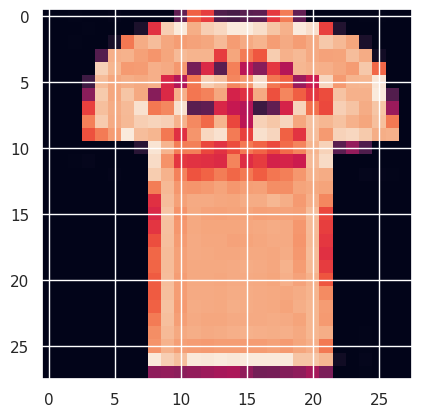

In [5]:
# YOUR CODE HERE

# First a sanity check (not asked by the exercise)
print(80*'-')
print("Sanity check - shape of X_train_fashion:", X_train_fashion.shape)
print("Sanity check - shape of X_train_digits:", X_train_digits.shape)

# Task 1: first training example in X_train_fashion
print(80*'-')
print("\nFirst training example in X_train_fashion:\n")
print(X_train_fashion[0,:,:])

print(80*'-')
# Also to display the image
plt.imshow(X_train_fashion[0,::])
plt.show()
# Other tasks in code cells below 

--------------------------------------------------------------------------------
First training example in X_train_digits:
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0. 

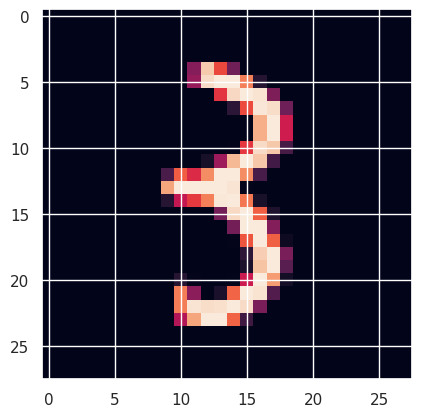

In [8]:
# Task 2: print out the first training example in X_train_digits
print(80*'-')
print("First training example in X_train_digits:")
print(X_train_digits[0,:,:])

# Also display the image
print(80*'-')
plt.imshow(X_train_digits[0,::])
plt.show()

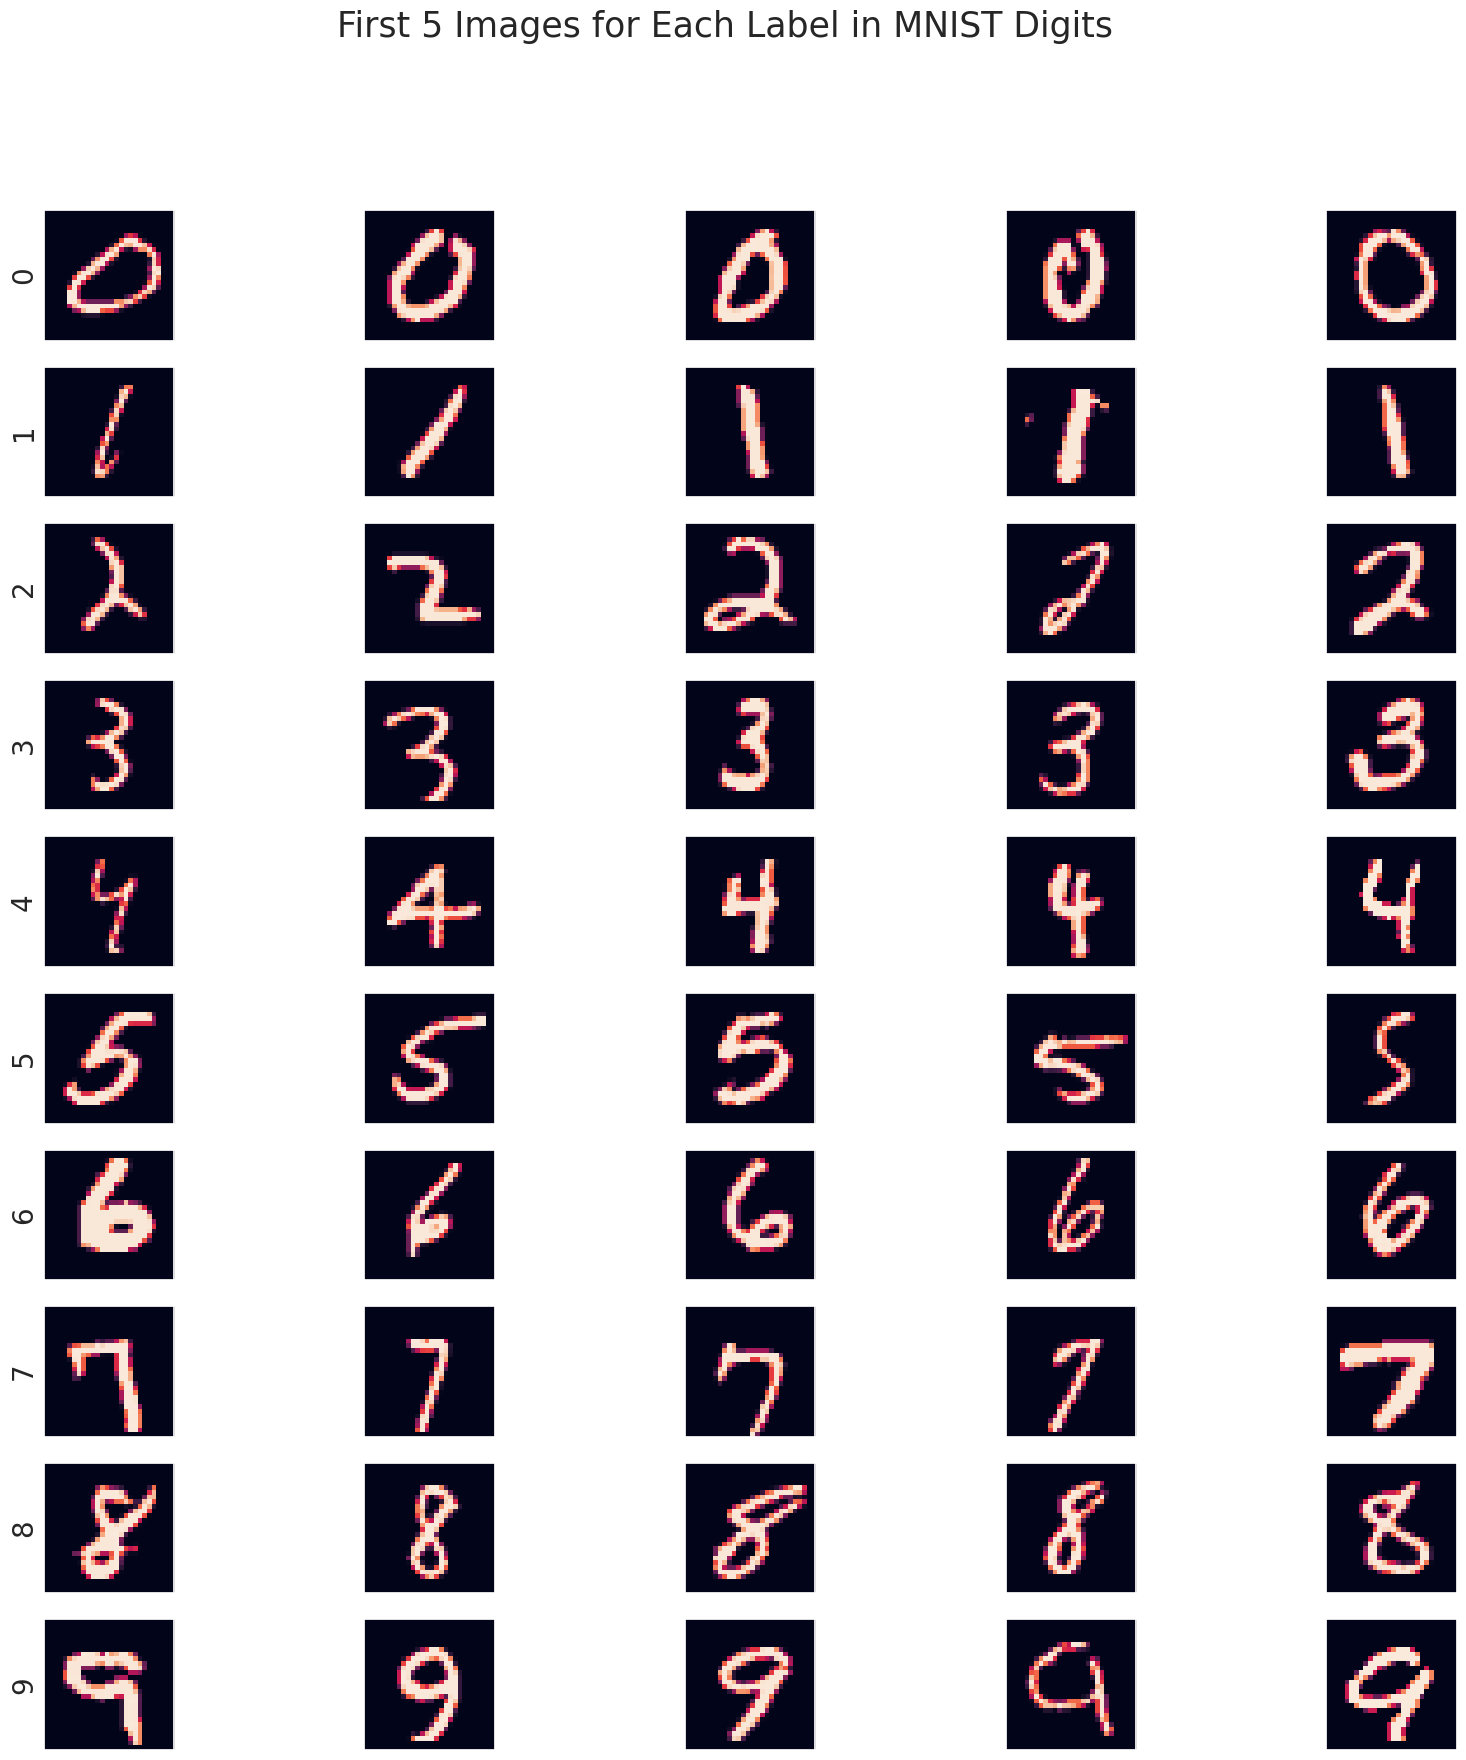

In [9]:
# Task 3: Display the first five images for each label
first_five_indices = {label:[] for label in np.unique(Y_train_digits)}

# Loop through Y_train_digits to fill in the dict
for idx, label in enumerate(Y_train_digits):
    if len(first_five_indices[label]) < 5:
        first_five_indices[label].append(idx)
    if all(len(indices) == 5 for indices in first_five_indices.values()):
        break

# Print this out if necessary
# first_five_indices

# Plot the first five images for each label
fig, ax = plt.subplots(10, 5,
                       figsize=(20, 20))

# Loop through each label, and display first 5 images for each label
for label in np.unique(Y_train_digits):
#   set col_num to 0 for the start of each INNER loop 
    col_num = 0
    ax[label, 0].set_ylabel(label,
                            fontsize=20)
    for idx in first_five_indices[label]:
        ax[label, col_num].imshow(X_train_digits[idx,:,:])
#                                      fontsize=12)
        ax[label, col_num].set_xticks([])
        ax[label, col_num].set_yticks([])
        col_num += 1

fig.suptitle("First 5 Images for Each Label in MNIST Digits",
             fontsize=25)
plt.show()        

### Step 4: Modeling

### <span style="color:chocolate">Exercise 2:</span> Define model (20 points)

1. Fill in the <span style="color:chocolate">build_model()</span> function below, including all the arguments listed in the function definition. Note: the activation function parameter is only for the the hidden layers; use the appropriate final classification function for the final layer.

In [10]:
# Building model
def build_model(n_classes,
                hidden_layer_sizes=[],
                activation='relu',
                optimizer='SGD',
                learning_rate=0.01,
                metric='metric'):
    """Build a multi-class logistic regression model using Keras.

    Args:
    n_classes: Number of output classes in the dataset.
    hidden_layer_sizes: A list with the number of units in each hidden layer.
    activation: The activation function to use for the hidden layers.
    optimizer: The optimizer to use (SGD, Adam).
    learning_rate: The desired learning rate for the optimizer.
    metric: The desired metric.

    Returns:
    model: A tf.keras model (graph).
    """
    tf.keras.backend.clear_session()
    np.random.seed(0)
    tf.random.set_seed(0)

    # YOUR CODE HERE
    model = tf.keras.Sequential()
    
    # Input layer (Flatten the 28x28 image into a 1D vector)
    model.add(tf.keras.layers.Input(shape=(28, 28)))  # Input layer for MNIST/Fashion MNIST
    model.add(tf.keras.layers.Flatten())  # Flatten image to vector
    
    # Hidden layers
    for units in hidden_layer_sizes:
        model.add(tf.keras.layers.Dense(units, activation=activation))
    
    # Output layer (Softmax for multi-class classification)
    model.add(tf.keras.layers.Dense(n_classes, activation='softmax'))
    
    # Choose optimizer
    if optimizer.lower() == 'sgd':
        opt = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    elif optimizer.lower() == 'adam':
        opt = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    else:
        raise ValueError("Unsupported optimizer. Use 'SGD' or 'Adam'.")

    # Compile the model
    model.compile(optimizer=opt,
                  loss='sparse_categorical_crossentropy',
                  metrics=[metric])
    return model

---
### Step 5: Experiments

You can now run a suite of experiments to see how the hyperparameters and layer sizes effect model performance. 

The <span style="color:chocolate">train_and_evaluate()</span> function below can be used to run experiments and retrieve results.

Training the digits model...


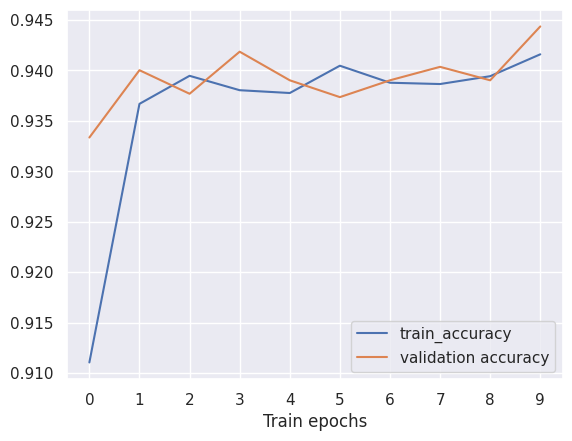

Training accuracy: 0.9416
Validation accuracy: 0.9443


In [29]:
def train_and_evaluate(data='digits',
                       hidden_layer_sizes=[128, 256],
                       activation='tanh',
                       optimizer='Adam',
                       learning_rate=0.01,
                       metric='accuracy',
                       num_epochs=10):

  # Build the model.
    model = build_model(n_classes=10,
                      hidden_layer_sizes=hidden_layer_sizes,
                      activation=activation,
                      optimizer=optimizer,
                      metric=metric,
                      learning_rate=learning_rate)

  # Select the dataset.
    if data == 'digits':
        X_train = X_train_digits
        X_test = X_test_digits
        Y_train = Y_train_digits
        Y_test = Y_test_digits
    
    elif data == 'fashion':
        X_train = X_train_fashion
        X_test = X_test_fashion
        Y_train = Y_train_fashion
        Y_test = Y_test_fashion
    else:
        raise 'Unsupported dataset: %s' %data

  # Train the model.
    print('Training the', data, 'model...')
    history = model.fit(
        x=X_train,
        y=Y_train,
        epochs=num_epochs,
        batch_size=64,
        validation_split=0.1,
        verbose=0)

    # Retrieve the training metrics (after each train epoch) and the final validation
    # accuracy.
    train_accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    plt.plot(train_accuracy, label='train_accuracy')
    plt.plot(val_accuracy, label='validation accuracy')
    plt.xticks(range(num_epochs))
    plt.xlabel('Train epochs')
    plt.legend()
    plt.show()
    
    print('Training accuracy: %1.4f' %train_accuracy[-1])
    print('Validation accuracy: %1.4f' %val_accuracy[-1])
    
    return model


# run the function
model = train_and_evaluate()

### <span style="color:chocolate">Exercise 3:</span> Ablation study (50 points)

1. Conduct experiments and record the training and validation set accuracy results in the table below. You may extend the table for additional experiments as needed.
2. Report the hyperparameter values for your preferred architecture configuration.
3. Run the model once more using your preferred hyperparameter configuration.

Data | Hidden sizes | Activation| Optimizer | Learning rate | #Parameters | Training accuracy| Validation accuracy
-|-|-|-|-|-|-|-
 digits | [] | tanh | SGD |0.01| 7850 | 0.9193 | 0.9167
 digits | [] | relu | SGD |0.01| 7850 | 0.9193 | 0.9150
 digits | [] | relu | Adam |0.01| 7850 | 0.9289 | 0.9042
 **digits** (best) | <u>[128]</u> | relu | Adam |0.01| 101770 | **0.9955** | **0.9752**
 digits | [256, 128] | relu | Adam |0.01| 235146 | 0.9903 | 0.9707
 digits | [128, 64, 32] | relu |Adam | 0.01 | xxxxx | 0.9904 | 0.9735
-|-|-|-|-|-|-|-
 fashion | [] | tanh | SGD |0.01| 7850 | 0.8593 | 0.8420
 fashion | [] | relu | SGD |0.01| 7850 | 0.8588 | 0.8415
 fashion | [] | relu | Adam |0.01| 7850 | 0.8606 | 0.8215
 fashion | [128] | relu | Adam |0.01| 101770 | 0.9059 | 0.8628
 fashion | [256, 128] | relu | Adam |0.01| 235146 | 0.9081 | 0.8612
-|-|-|-|-|-|-|-
 fashion | [512, 256, 128] | relu | Adam |0.01| xxxxx | 0.8987 | 0.8647
 **fashion** (best) | <u>[128, 64, 32]</u> | relu | Adam |0.01| xxxxx | **0.9069** | **0.8683**

#### Answer to Ex 3: the ablation experiments are put in individual cells below.

Training the digits model...


2025-02-20 23:30:31.724465: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 169344000 exceeds 10% of free system memory.


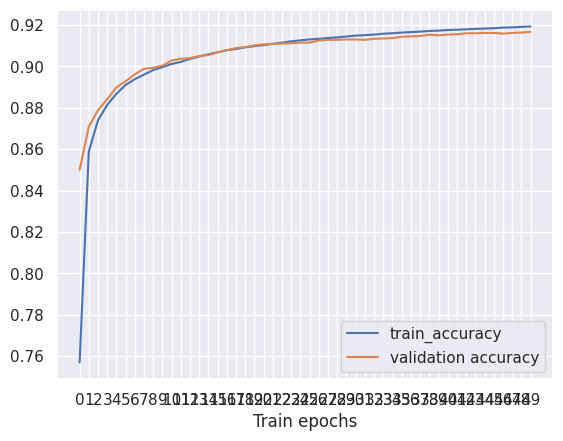

Training accuracy: 0.9193
Validation accuracy: 0.9167


In [12]:
# YOUR CODE HERE
model_2 = train_and_evaluate(data='digits',
                             hidden_layer_sizes=[],
                             activation='tanh',
                             optimizer='SGD',
                             learning_rate=0.01,
                             num_epochs=50)

Training the digits model...


2025-02-20 23:32:55.067011: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 169344000 exceeds 10% of free system memory.


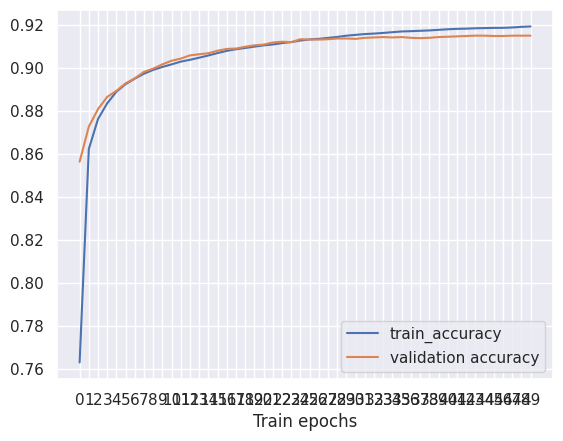

Training accuracy: 0.9193
Validation accuracy: 0.9150


In [13]:
model_3 = train_and_evaluate(data='digits',
                             hidden_layer_sizes=[],
                             activation='relu',
                             optimizer='SGD',
                             learning_rate=0.01,
                             num_epochs=50)

Training the digits model...


2025-02-20 23:36:41.354825: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 169344000 exceeds 10% of free system memory.


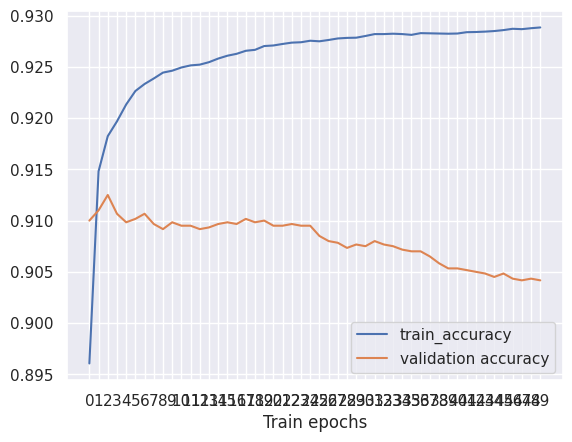

Training accuracy: 0.9289
Validation accuracy: 0.9042


In [14]:
model_4 = train_and_evaluate(data='digits',
                             hidden_layer_sizes=[],
                             activation='relu',
                             optimizer='ADAM',
                             learning_rate=0.01,
                             num_epochs=50)

##### Best model for 'digits'

Training the digits model...


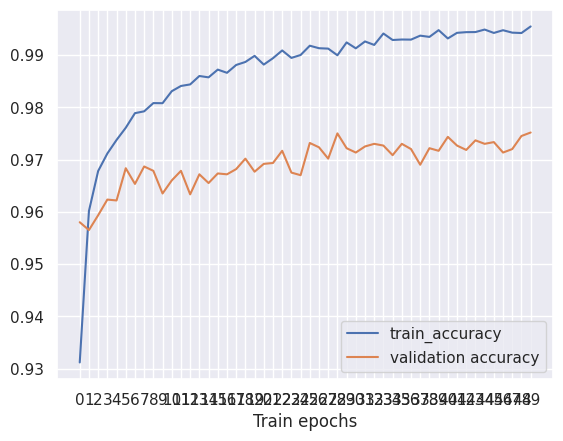

Training accuracy: 0.9955
Validation accuracy: 0.9752


In [15]:
model_5 = train_and_evaluate(data='digits',
                             hidden_layer_sizes=[128],
                             activation='relu',
                             optimizer='ADAM',
                             learning_rate=0.01,
                             num_epochs=50)

Training the digits model...


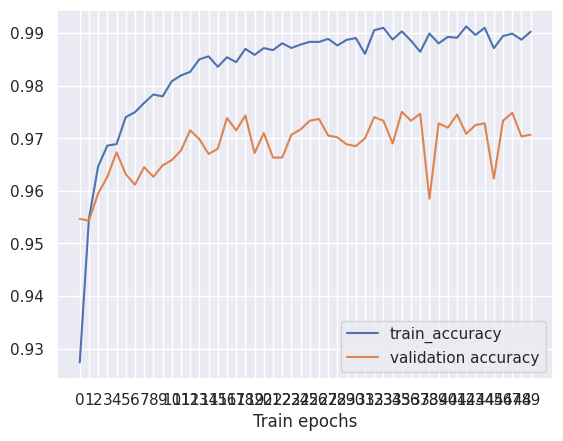

Training accuracy: 0.9903
Validation accuracy: 0.9707


In [16]:
model_6 = train_and_evaluate(data='digits',
                             hidden_layer_sizes=[256, 128],
                             activation='relu',
                             optimizer='ADAM',
                             learning_rate=0.01,
                             num_epochs=50)

Training the digits model...


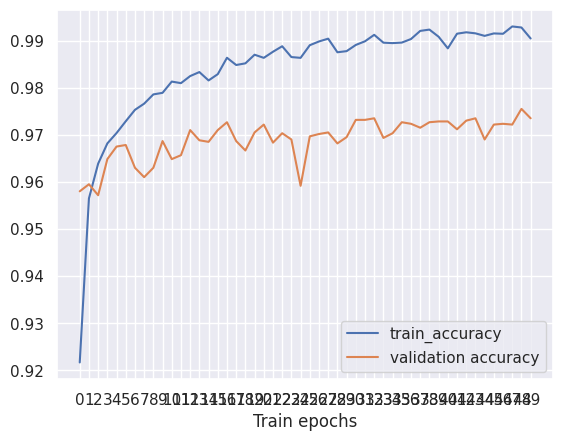

Training accuracy: 0.9904
Validation accuracy: 0.9735


In [49]:
model_x = train_and_evaluate(data='digits',
                             hidden_layer_sizes=[128, 64, 32],
                             activation='relu',
                             optimizer='ADAM',
                             learning_rate=0.01,
                             num_epochs=50)

Training the fashion model...


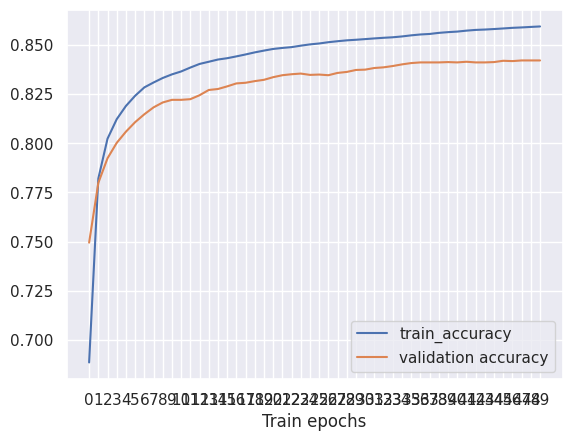

Training accuracy: 0.8593
Validation accuracy: 0.8420


In [17]:
model_7 = train_and_evaluate(data='fashion',
                             hidden_layer_sizes=[],
                             activation='tanh',
                             optimizer='SGD',
                             learning_rate=0.01,
                             num_epochs=50)

Training the fashion model...


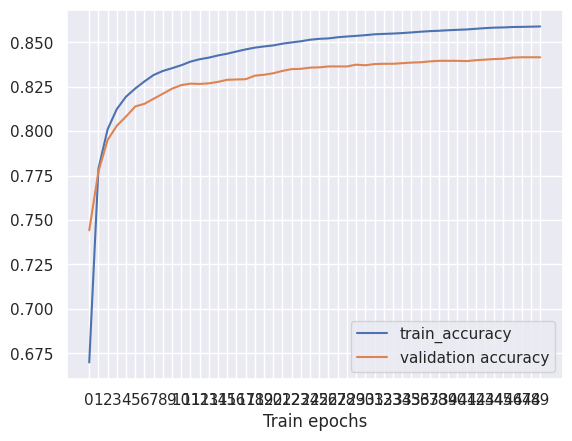

Training accuracy: 0.8588
Validation accuracy: 0.8415


In [18]:
model_8 = train_and_evaluate(data='fashion',
                             hidden_layer_sizes=[],
                             activation='relu',
                             optimizer='SGD',
                             learning_rate=0.01,
                             num_epochs=50)

Training the fashion model...


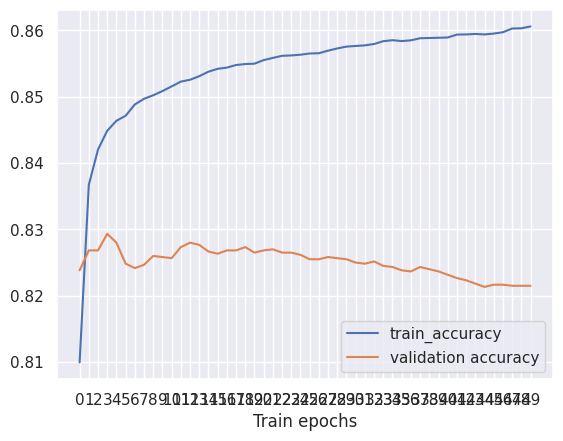

Training accuracy: 0.8606
Validation accuracy: 0.8215


In [19]:
model_9 = train_and_evaluate(data='fashion',
                             hidden_layer_sizes=[],
                             activation='relu',
                             optimizer='ADAM',
                             learning_rate=0.01,
                             num_epochs=50)

Training the fashion model...


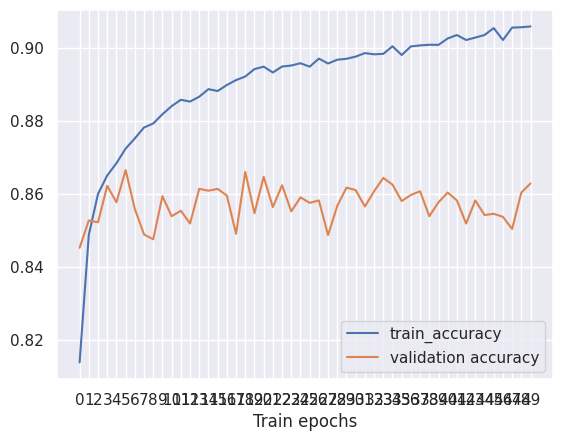

Training accuracy: 0.9059
Validation accuracy: 0.8628


In [20]:
model_10 = train_and_evaluate(data='fashion',
                             hidden_layer_sizes=[128],
                             activation='relu',
                             optimizer='ADAM',
                             learning_rate=0.01,
                             num_epochs=50)

Training the fashion model...


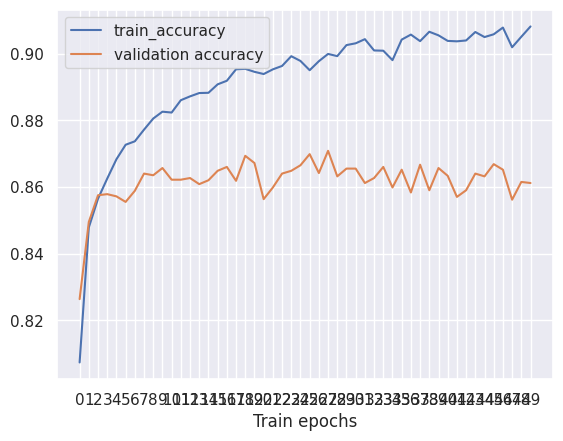

Training accuracy: 0.9081
Validation accuracy: 0.8612


In [21]:
model_11 = train_and_evaluate(data='fashion',
                             hidden_layer_sizes=[256, 128],
                             activation='relu',
                             optimizer='ADAM',
                             learning_rate=0.01,
                             num_epochs=50)

##### Best model for 'fashion'

Training the fashion model...


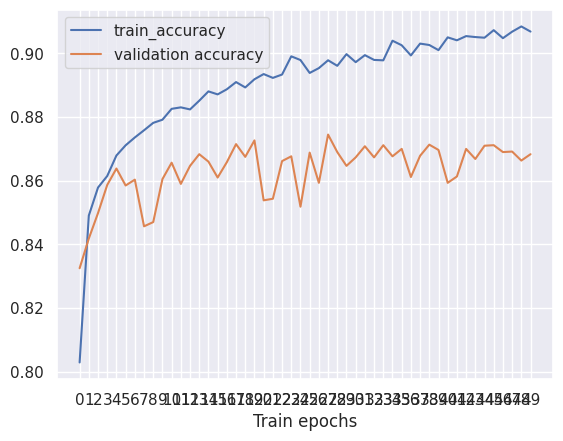

Training accuracy: 0.9069
Validation accuracy: 0.8683


In [48]:
model_12 = train_and_evaluate(data='fashion',
                             hidden_layer_sizes=[128, 64, 32],
                             activation='relu',
                             optimizer='ADAM',
                             learning_rate=0.01,
                             num_epochs=50)

---
### Step 6: Evaluation and Generalization

### <span style="color:chocolate">Exercise 4:</span> Compute metrics (25 points)

Now that you've determined the optimal set of hyperparameters, it's time to evaluate your optimized model on the test data to gauge its performance in real-world scenarios, commonly known as inference.

1. Calculate accuracy on both train and test datasets. Note: you will need to convert the vector of predicted probabilities to a class label using the argmax operation. Hint: You can utilize the <span style="color:chocolate">model.predict()</span> method provided by tf.keras and the <span style="color:chocolate">np.max()</span> method available in NumPy; or you can use the <span style="color:chocolate">model.evaluare()</span> method provided by tf.keras directly.

2. Does the model demonstrate strong generalization capabilities? Provide an explanation based on your accuracy observations.

##### Ex4 Ans i) Building best model for 'digits' and store history

In [16]:
# YOUR CODE HERE

# Build the best model for 'digits' data according to the ablation study 
best_model_digits = build_model(n_classes=10,
                    hidden_layer_sizes=[128],
                    activation='relu',
                    optimizer='ADAM',
                    learning_rate=0.01, 
                    metric="accuracy")


In [17]:
# Fit the best model and store the results in history_digits
# Epoch 45 is the number of epochs where trianing accuracy is still improving but validation accuracy peaks
history_digits = best_model_digits.fit(
        x=X_train_digits,
        y=Y_train_digits,
        epochs=45,
        batch_size=64,
        validation_split=0.1,
        verbose=1)


Epoch 1/45


2025-02-22 18:52:33.047853: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 169344000 exceeds 10% of free system memory.


844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8930 - loss: 0.3442 - val_accuracy: 0.9497 - val_loss: 0.1760
Epoch 2/45
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9569 - loss: 0.1406 - val_accuracy: 0.9545 - val_loss: 0.1535
Epoch 3/45
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9677 - loss: 0.1091 - val_accuracy: 0.9592 - val_loss: 0.1656
Epoch 4/45
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9699 - loss: 0.1024 - val_accuracy: 0.9648 - val_loss: 0.1442
Epoch 5/45
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9743 - loss: 0.0924 - val_accuracy: 0.9610 - val_loss: 0.1618
Epoch 6/45
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9798 - loss: 0.0724 - val_accuracy: 0.9625 - val_loss: 0.1847
Epoch 7/45
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9778 - loss: 0.0809 - val_accuracy: 0.9637 - val_loss: 0.1739
Epoch 8/45
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9797 - loss: 0.0747 - val_accuracy: 0.9672 - val_

##### Ex4 Ans ii) Building best model for 'fashion' and store history

In [13]:
# Building best model for 'fashion' dataset
best_model_fashion = build_model(n_classes=10,
                    hidden_layer_sizes=[128, 64, 32],
                    activation='relu',
                    optimizer='ADAM',
                    learning_rate=0.01, 
                    metric="accuracy")


In [14]:
# Fit the model and store results
# Epoch 45 is about the epoch where validation accuracy peaks (and training accuracy is still improving)
history_fashion = best_model_fashion.fit(
        x=X_train_fashion,
        y=Y_train_fashion,
        epochs=45,
        batch_size=64,
        validation_split=0.1,
        verbose=1)


Epoch 1/45


2025-02-22 18:45:40.288313: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 169344000 exceeds 10% of free system memory.


844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7384 - loss: 0.7138 - val_accuracy: 0.8377 - val_loss: 0.4480
Epoch 2/45
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8428 - loss: 0.4321 - val_accuracy: 0.8497 - val_loss: 0.4060
Epoch 3/45
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8543 - loss: 0.4024 - val_accuracy: 0.8525 - val_loss: 0.4096
Epoch 4/45
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8590 - loss: 0.3932 - val_accuracy: 0.8585 - val_loss: 0.4136
Epoch 5/45
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8667 - loss: 0.3669 - val_accuracy: 0.8580 - val_loss: 0.4035
Epoch 6/45
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8703 - loss: 0.3631 - val_accuracy: 0.8628 - val_loss: 0.4024
Epoch 7/45
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8725 - loss: 0.3623 - val_accuracy: 0.8600 - val_loss: 0.4066
Epoch 8/45
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8761 - loss: 0.3480 - val_accuracy: 0.8577 - val_

##### Ex4 Ans iii) Print out metrics

In [18]:
# Import function to calculate accuracy_score
# I assume we are allowed to use available packages as we were not told not to.
from sklearn.metrics import accuracy_score

# Predict (train dataset) probabilities then convert to labels for DIGITS
predicted_train_label_digits = np.argmax(best_model_digits.predict(X_train_digits), axis=1)

# Predict (test dataset) probabilities then convert to labels for DIGITS
predicted_test_label_digits = np.argmax(best_model_digits.predict(X_test_digits), axis=1)

# Calculate accuracy scores for both train and test datasets (DIGITS)
train_accu_digits = accuracy_score(Y_train_digits, predicted_train_label_digits)
test_accu_digits = accuracy_score(Y_test_digits, predicted_test_label_digits)

print(50*"-")
print(f"Aggregate accuracy on train (DIGITS): {train_accu_digits:.3f}")
print(50*"-")
print(f"Aggregate accuracy on test (DIGITS): {test_accu_digits:.3f}")
print(50*'-')

 195/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 779us/step

2025-02-22 18:54:37.819838: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 756us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step
--------------------------------------------------
Aggregate accuracy on train (DIGITS): 0.993
--------------------------------------------------
Aggregate accuracy on test (DIGITS): 0.974
--------------------------------------------------


In [19]:

# Predict (train dataset) probabilities then convert to labels for FASHION
predicted_train_label_fashion = np.argmax(best_model_fashion.predict(X_train_fashion), axis=1)

# Predict (test dataset) probabilities then convert to labels for FASHION
predicted_test_label_fashion = np.argmax(best_model_fashion.predict(X_test_fashion), axis=1)

# Calculate accuracy scores for both train and test datasets (FASHION)
train_accu_fashion = accuracy_score(Y_train_fashion, predicted_train_label_fashion)
test_accu_fashion = accuracy_score(Y_test_fashion, predicted_test_label_fashion)

print(50*"-")
print(f"Aggregate accuracy on train (FASHION): {train_accu_fashion:.3f}")
print(50*"-")
print(f"Aggregate accuracy on test (FASHION): {test_accu_fashion:.3f}")
print(50*'-')

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 852us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 851us/step
--------------------------------------------------
Aggregate accuracy on train (FASHION): 0.900
--------------------------------------------------
Aggregate accuracy on test (FASHION): 0.866
--------------------------------------------------


##### Ex4 Ans iv)

 - For <u>**'digits'**</u> dataset, aggregate accuracy on the test dataset is a very good **0.974**, slightly lower than that in train <u>0.993</u>. Hence the **best model for 'digits' generalizes well - strong generalization capability**.
 - For <u>**'fashion'**</u> dataset, aggregate accuracy on the test dataset is a reasonably good **0.866**, lower, but not too much, than that in train <u>0.900</u>. Hence the **best model for 'fashion' also generalizes well**, although the capability of generalizatio is not as strong as the best model for digits.